In [2]:
import pickle
import pandas as pd
import numpy as np
from mesh_import import mesh

E:\LangOn\OntoDeepLex\src\mesh\cns.py:3: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [3]:
asbc_dir = mesh.get_data_dir()/"asbc"

In [4]:
with (asbc_dir/"asbc5_characters.pkl").open("rb") as fin:
    chfreq = pickle.load(fin)
with (asbc_dir/"asbc5_words.pkl").open("rb") as fin:
    wdfreq = pickle.load(fin)

In [5]:
affix_dir = mesh.get_data_dir() / "affix"
ckip_affix = mesh.affix.CkipAffixes(affix_dir)

In [6]:
from collections import Counter
from itertools import chain

first_ch = Counter(chain.from_iterable(x[0] for x in wdfreq.keys() if len(x) >= 2))
last_ch = Counter(chain.from_iterable(x[-1] for x in wdfreq.keys() if len(x) >= 2))


In [7]:
data = []
for ch, cfreq in chfreq.items():
    ch_aswd_freq = wdfreq.get(ch, 0)
    lexicalized = np.log(ch_aswd_freq/cfreq)
    prefix_prod = np.log(first_ch.get(ch, 0)+1)
    suffix_prod = np.log(last_ch.get(ch, 0)+1)
    data.append((ch, cfreq, lexicalized, prefix_prod, suffix_prod))
affix_data = pd.DataFrame.from_records(data, 
                                       columns=("character", "ch_freq", 
                                                "lexicalized", "prefix_prod", "suffix_prod"))

<ipython-input-7-e2372af7ce00>:4: RuntimeWarning: divide by zero encountered in log
  lexicalized = np.log(ch_aswd_freq/cfreq)


In [18]:
for row_idx in affix_data.index:
    res = ckip_affix.query(affix_data.loc[row_idx, "character"])
    is_prefix = any(x.affix_type=="prefix" for x in res)
    is_suffix = any(x.affix_type=="suffix" for x in res)
    affix_data.loc[row_idx, "is_prefix"] = is_prefix
    affix_data.loc[row_idx, "is_suffix"] = is_suffix

In [19]:
affix_data.head()

,character,ch_freq,lexicalized,prefix_prod,suffix_prod,is_prefix,is_suffix
0,時,67941,-1.258586,5.117994,5.303305,True,True
1,間,28909,-1.851887,3.951244,5.030438,True,True
2,三,34728,-1.005629,7.350516,6.186209,True,True
3,月,21016,-1.506698,4.955827,5.225747,True,True
4,十,46416,-2.625406,6.447306,5.564520,True,False


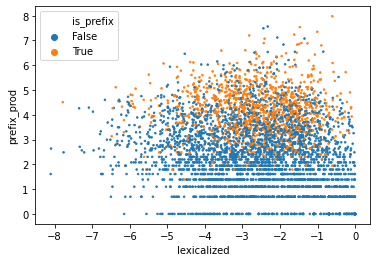

In [32]:
import seaborn as sns
sns.scatterplot("lexicalized", "prefix_prod", data=affix_data, hue="is_prefix", edgecolor=None, s=3)

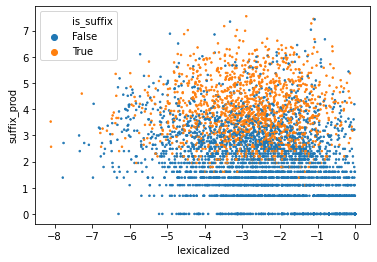

In [33]:
import seaborn as sns
sns.scatterplot("lexicalized", "suffix_prod", data=affix_data, hue="is_suffix", edgecolor=None, s=3)